# Data Exploration Exercises
***

#### Spam Data

- Load the spam data set.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from sklearn.cluster import KMeans
import numpy as np
from wordcloud import WordCloud

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

In [2]:
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

In [3]:
# Load data from spam_db

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
def clean(text):
    '''Simplified text cleaning function'''
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return re.sub(r"[^a-z0-9\s]", '', text)

In [5]:
# combine all messages in single string by label

ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

- Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?

### bigram: combinations of 2 words
 - Represent text as combinations of 2 words

Text(0.5, 1.0, 'Top 10 most common spam bigrams')

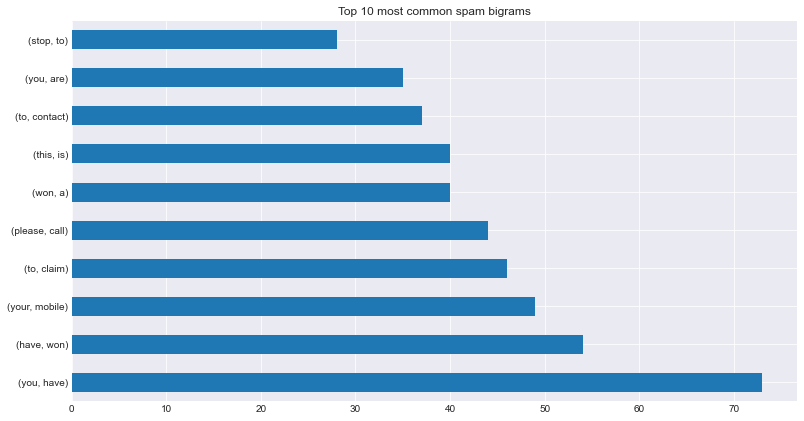

In [6]:
pd.Series(nltk.bigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam bigrams')

Text(0.5, 1.0, 'Top 10 most common ham bigrams')

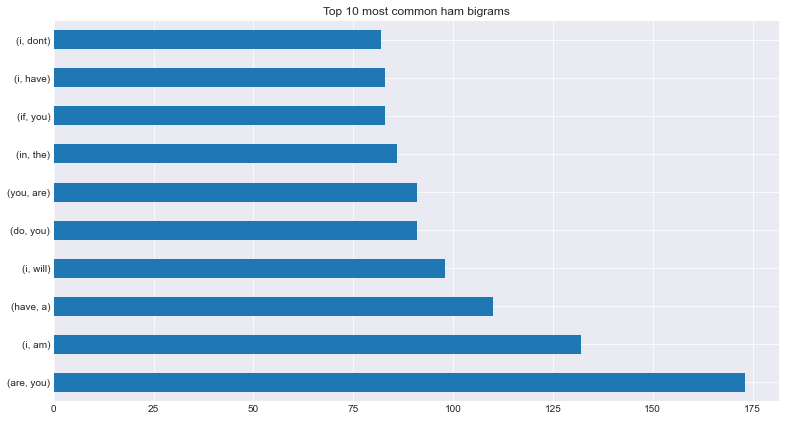

In [7]:
pd.Series(nltk.bigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham bigrams')

#### Word Cloud

(-0.5, 799.5, 599.5, -0.5)

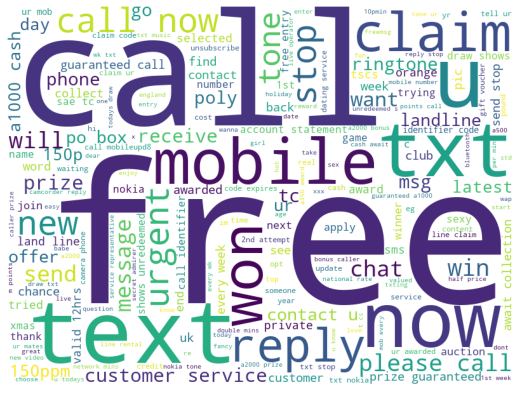

In [8]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(spam_words)
plt.imshow(img)
plt.axis('off')

(-0.5, 799.5, 599.5, -0.5)

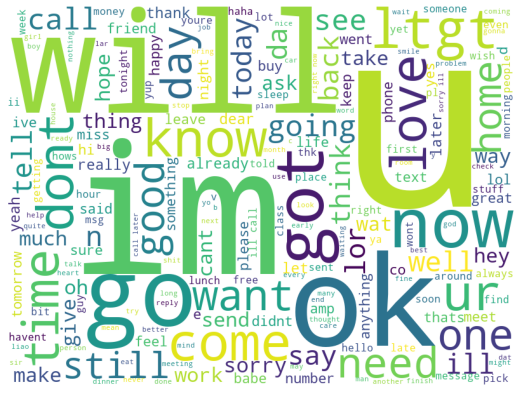

In [9]:
from wordcloud import WordCloud

img = WordCloud(background_color='white', width=800, height=600).generate(ham_words)
plt.imshow(img)
plt.axis('off')

- Is there any overlap in the bigrams for the spam data and the ham data?
     - yes: you are

- Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

Text(0.5, 1.0, 'Top 10 most common spam trigrams')

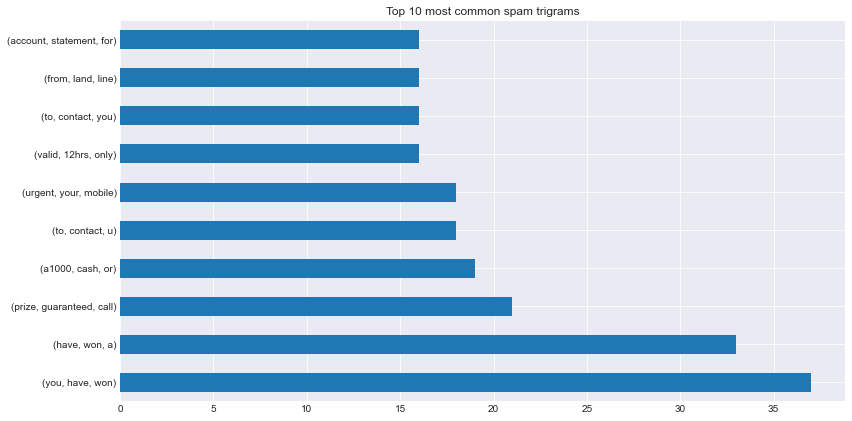

In [10]:
pd.Series(nltk.trigrams(spam_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common spam trigrams')

Text(0.5, 1.0, 'Top 10 most common ham trigrams')

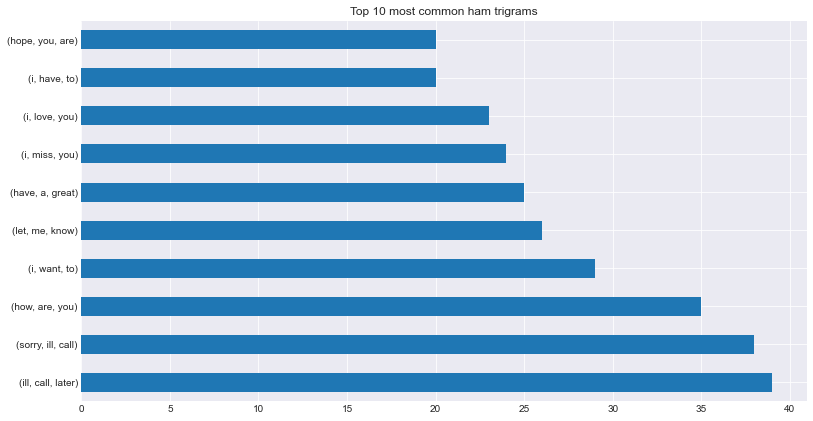

In [11]:
pd.Series(nltk.trigrams(ham_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common ham trigrams')

#### 2.) Explore the blog articles using the techniques discussed in the exploration lesson.

In [12]:
# Check message length and word count in spam and ham

# add two new columns 'message_length' and 'word_count'

df['message_length'] = df.text.apply(len)

df['word_count'] = df.text.apply(clean).apply(str.split).apply(len)

df.head()

,label,text,message_length,word_count
id,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


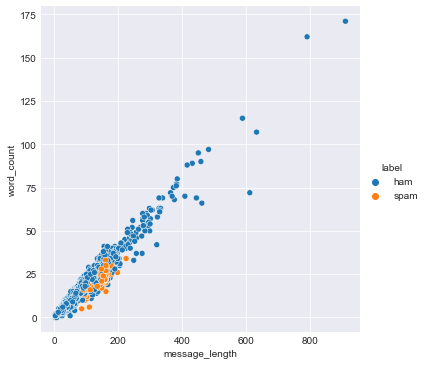

In [13]:
sns.relplot(data = df, x = 'message_length', y = 'word_count', hue = 'label');

In [14]:
df.groupby('label').message_length.agg(['mean', 'median'])

,mean,median
label,,
ham,71.023627,52
spam,138.866131,149


In [15]:
# Check out sentiment in spam and ham

import nltk.sentiment

sia = nltk.sentiment.SentimentIntensityAnalyzer()

In [16]:
df['sentiment'] = df.text.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df

,label,text,message_length,word_count,sentiment
id,,,,,
0,ham,"Go until jurong point, crazy.. Available only ...",111,20,0.6249
1,ham,Ok lar... Joking wif u oni...,29,6,0.4767
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,0.7964
3,ham,U dun say so early hor... U c already then say...,49,11,0.0000
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13,-0.1027
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,30,0.8805
5568,ham,Will Ì_ b going to esplanade fr home?,37,8,0.0000
5569,ham,"Pity, * was in mood for that. So...any other s...",57,9,-0.2960


In [17]:
# is the mean and median values of sentiment score different for ham vs spam?
df.groupby('label').sentiment.agg(['mean','median'])

,mean,median
label,,
ham,0.152218,0.0000
spam,0.436018,0.6107


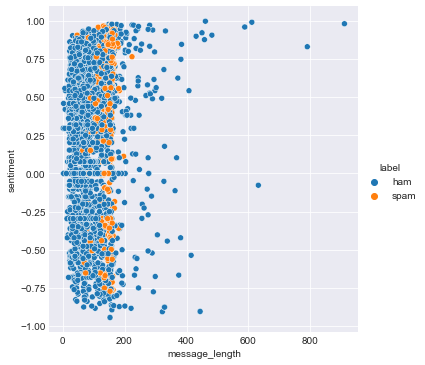

In [18]:
# plot message_length vs sentiment and hue by label
sns.relplot(data = df, x = 'message_length', y = 'sentiment', hue = 'label');

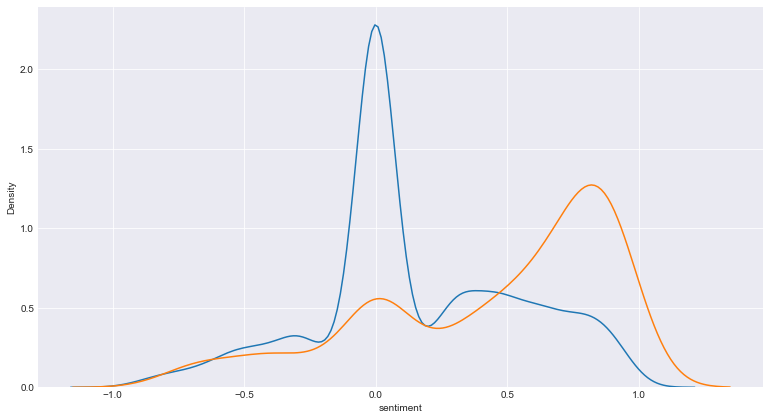

In [19]:
# is the distribution for sentiment different for ham vs spam
sns.kdeplot(df[df.label == 'ham'].sentiment, label = 'ham')
sns.kdeplot(df[df.label == 'spam'].sentiment, label = 'spam');

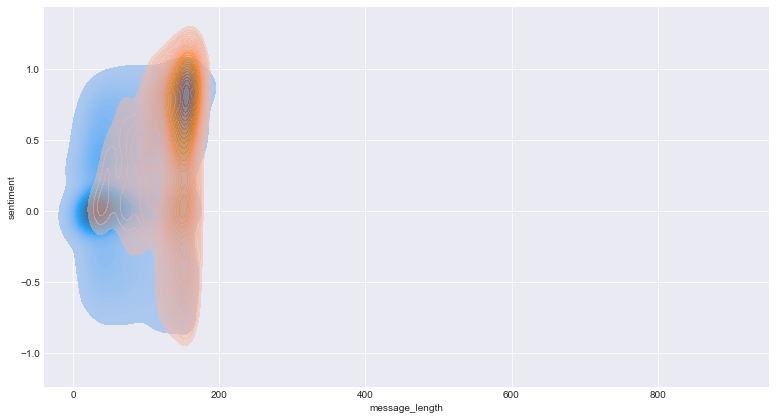

In [20]:
# Bivariate KDE plot for message_length vs sentiment score 
sns.kdeplot(df[df.label == 'ham'].message_length,df[df.label == 'ham'].sentiment, levels = 30, shade = True )
sns.kdeplot(df[df.label == 'spam'].message_length,df[df.label == 'spam'].sentiment, levels = 30, shade = True, alpha = 0.5 );

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

documents = ["This little kitty came to play when I was eating at a restaurant.",
             "Merley has the best squooshy kitten belly.",
             "Google Translate app is incredible.",
             "If you open 100 tab in google you get a smiley face.",
             "Best cat photo I've ever taken.",
             "Climbing ninja cat.",
             "Impressed with google map feedback.",
             "Key promoter extension for Google Chrome."]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["chrome browser to open."])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["My cat is hungry."])
prediction = model.predict(Y)
print(prediction)

Top terms per cluster:
Cluster 0:
 cat
 best
 climbing
 ninja
 ve
 photo
 taken
 belly
 merley
 kitten
Cluster 1:
 google
 feedback
 map
 app
 impressed
 incredible
 translate
 key
 extension
 chrome


Prediction
[1]
[0]


In [22]:
# Explore blog articles

df = acquire.get_blog_articles()

In [23]:
df.columns

Index(['{"title":{"0":"Codeup Start Dates for March 2022"',
       '1:"VET TEC Funding Now Available For Dallas Veterans"',
       '2:"Dallas Campus Re-opens With New Grant Partner"',
       '3:"Codeup Dallas Open House"',
       '4:"Codeup\u2019s Placement Team Continues Setting Records"',
       '5:"IT Certifications 101: Why They Matter',
       ' and Why They Don\u2019t"',
       '6:"A rise in cyber attacks means opportunities for veterans in San Antonio"',
       '7:"Use your GI Bill\u00ae benefits to Land a Job in Tech"',
       '8:"Which program is right for me: Cyber Security or Systems Engineering?"',
       ...
       'In a 2019 survey conducted by Blind, 83% of LGBQ technologists and 78% of trans or gender non-conforming technologists reported that they felt safe in the workplace. In 2020, those numbers dropped to 76% and 64%, respectively. Why the drop? Maybe recent pushes for representation in tech weren\u2019t followed up with efforts to truly cultivate inclusivity and gr

In [24]:
# combine all messages in single string by label

blog_words = prepare.basic_clean(str(df))

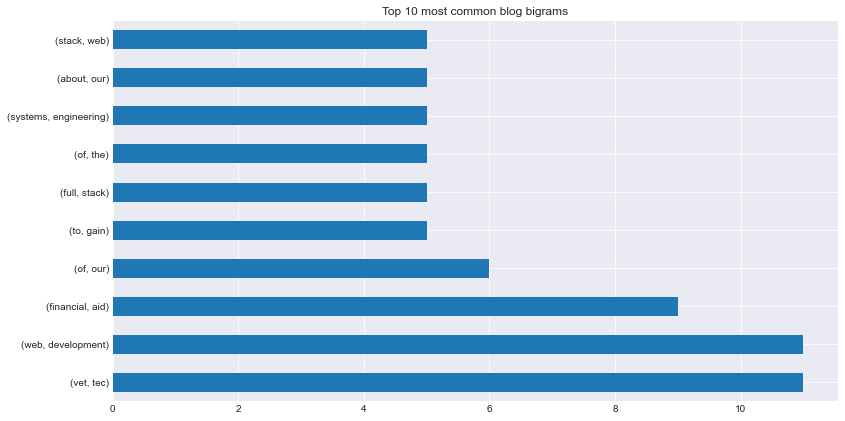

In [25]:
# N_grams
pd.Series(nltk.bigrams(blog_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common blog bigrams');

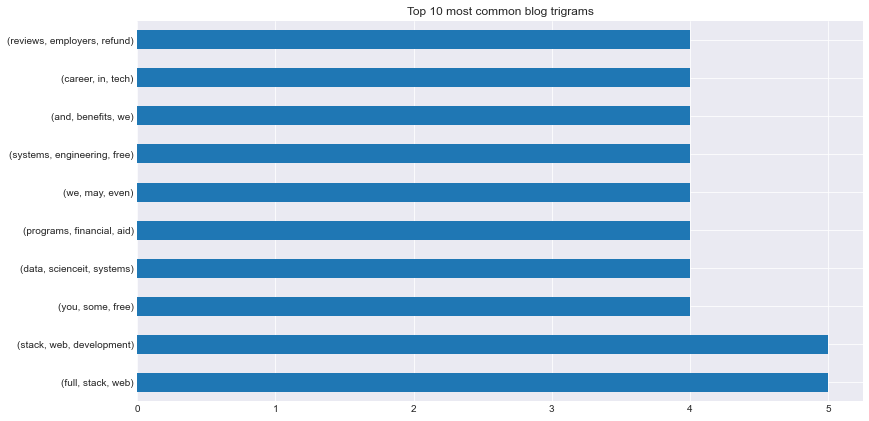

In [26]:
pd.Series(nltk.trigrams(blog_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common blog trigrams');

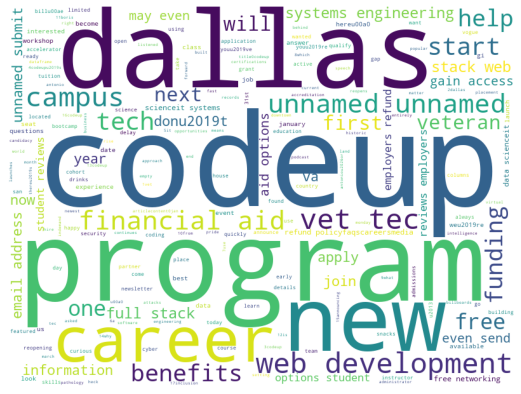

In [27]:
# Word cloud of blog words
img = WordCloud(background_color='white', width=800, height=600).generate(blog_words)
plt.imshow(img)
plt.axis('off');

#### 3.) Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [28]:
# Explore the news articles
categories = ['business',
           'sports',
           'technology',
           'entertainment']

df = acquire.get_news_articles(categories)

In [29]:
df.columns

Index(['title', 'author', 'content', 'category'], dtype='object')

In [30]:
# combine all messages in single string by label

news_words = prepare.basic_clean(str(df.content))

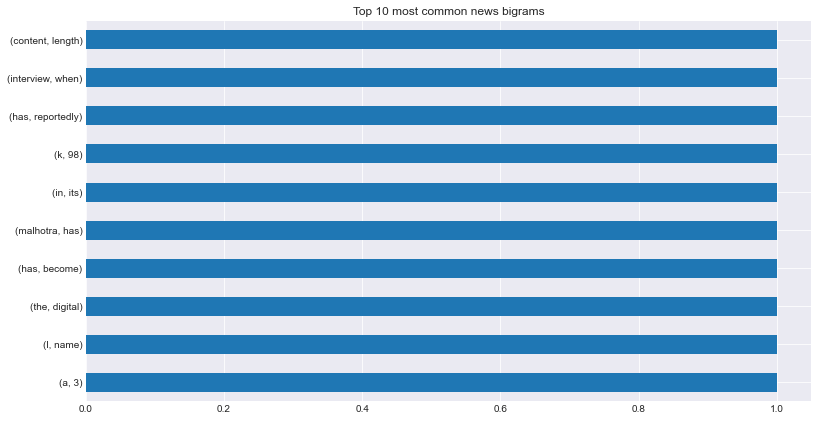

In [31]:
# N_grams
pd.Series(nltk.bigrams(news_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common news bigrams');

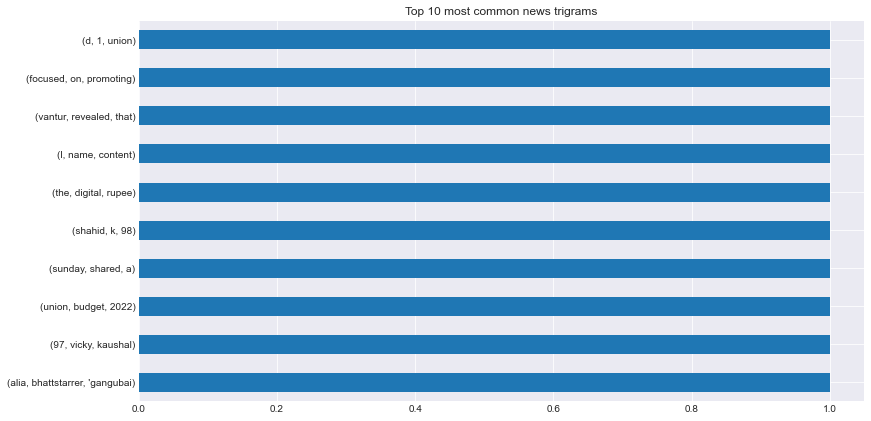

In [32]:
pd.Series(nltk.trigrams(news_words.split())).value_counts().head(10).plot.barh()
plt.title('Top 10 most common news trigrams');

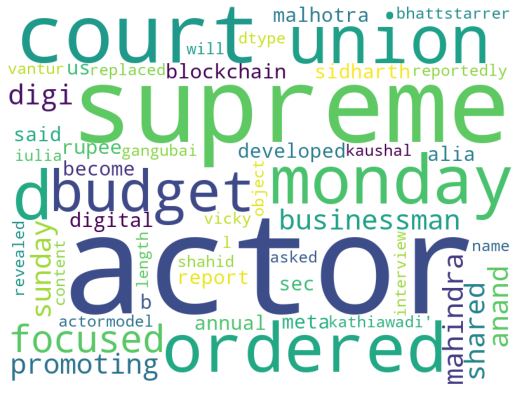

In [33]:
# Word cloud of blog words
img = WordCloud(background_color='white', width=800, height=600).generate(news_words)
plt.imshow(img)
plt.axis('off');

In [34]:
df['sentiment'] = df.content.apply(lambda doc: sia.polarity_scores(doc)['compound'])
df

,title,author,content,category,sentiment
0,Start demolition of Supertech's 40-storey twin...,Ridham Gambhir,The Supreme Court on Monday ordered that the d...,business,0.7650
1,The focus is on growth and adoption for Digita...,Roshan Gupta,Union Budget 2022 is focused on promoting digi...,business,0.9287
2,"COVID, you did your worst & stole our voice: M...",Sakshita Khosla,Businessman Anand Mahindra on Sunday shared a ...,business,-0.4404
3,RBI's digital rupee blockchain would be able t...,Pragya Swastik,The digital rupee blockchain being developed b...,business,0.0000
4,"Meta says data regulations may cause Facebook,...",Pragya Swastik,Meta in its annual report to the US SEC said i...,business,-0.1779
...,...,...,...,...,...
95,Sidharth only Indian actor with 160mn views of...,Kriti Kambiri,Actor Sidharth Malhotra has become the only In...,entertainment,0.0000
96,Alia's 'Gangubai Kathiawadi' to have 5 screeni...,Kriti Kambiri,Alia Bhatt-starrer 'Gangubai Kathiawadi' will ...,entertainment,0.7506
97,Vicky replaces Shahid in film based on Mahabha...,Udit Gupta,Vicky Kaushal has reportedly replaced Shahid K...,entertainment,0.5267
98,"Kabir Bedi was like my first crush, I still ad...",Amartya Sharma,Actor-model Iulia Vantur revealed that actor K...,entertainment,0.8910
